#Heart Disease Analysis and Probability Prediction

##Reading, Loading and Storing in a Dataframe

In [1]:
'''
List of available features:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}
    
The actual number of feature variables (after converting categorical variables
to dummy ones) is: 
1 (age) + 1 (sex) + 3 (cp) + 1 (restbp) + 1 (chol) + 1 (fbs) + 2 (restecg) + 
1 (thalach) + 1 (exang) + 1 (oldpeak) + 2 (slope) + 1 (ca) + 2 (thal) = 18

The response variable (num) is categorical with 5 values, but we don't have
enough data to predict all the categories. Therefore we'll replace num with:
14. hd (heart disease): categorical, 2 values {0: no, 1: yes}
'''
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint

# Given two histograms x and y (with the same range and binning), the following function
# calculates the intrinsic discrepancy (a symmetrized Kullback-Leibler distance) between them.
def intrinsic_discrepancy(x,y):
    assert len(x)==len(y)
    sumx = sum(xval for xval in x)
    sumy = sum(yval for yval in y)
    id1  = 0.0
    id2  = 0.0
    for (xval,yval) in zip(x,y):
        if (xval>0) and (yval>0):
            id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
            id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
    return min(id1,id2)


In [2]:
#Reading the data fron CSV file using pandas and creating Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df0 = pd.read_table("original_datasets/heart_disease_all14.csv", sep=',', header=None, names=columns)

In [3]:
#Viewing first few rows of dataset
df0.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [4]:
#Computing mean,count,etc. characteristics
df0.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
#Checking the number of rows and columns in the dataset
df0.shape

(299, 14)

In [6]:
#Checking feature information
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
age        299 non-null float64
sex        299 non-null float64
cp         299 non-null float64
restbp     299 non-null float64
chol       299 non-null float64
fbs        299 non-null float64
restecg    299 non-null float64
thalach    299 non-null float64
exang      299 non-null float64
oldpeak    299 non-null float64
slope      299 non-null float64
ca         299 non-null float64
thal       299 non-null float64
num        299 non-null float64
dtypes: float64(14)
memory usage: 32.8 KB


##Generating histograms for viewing distribution of values

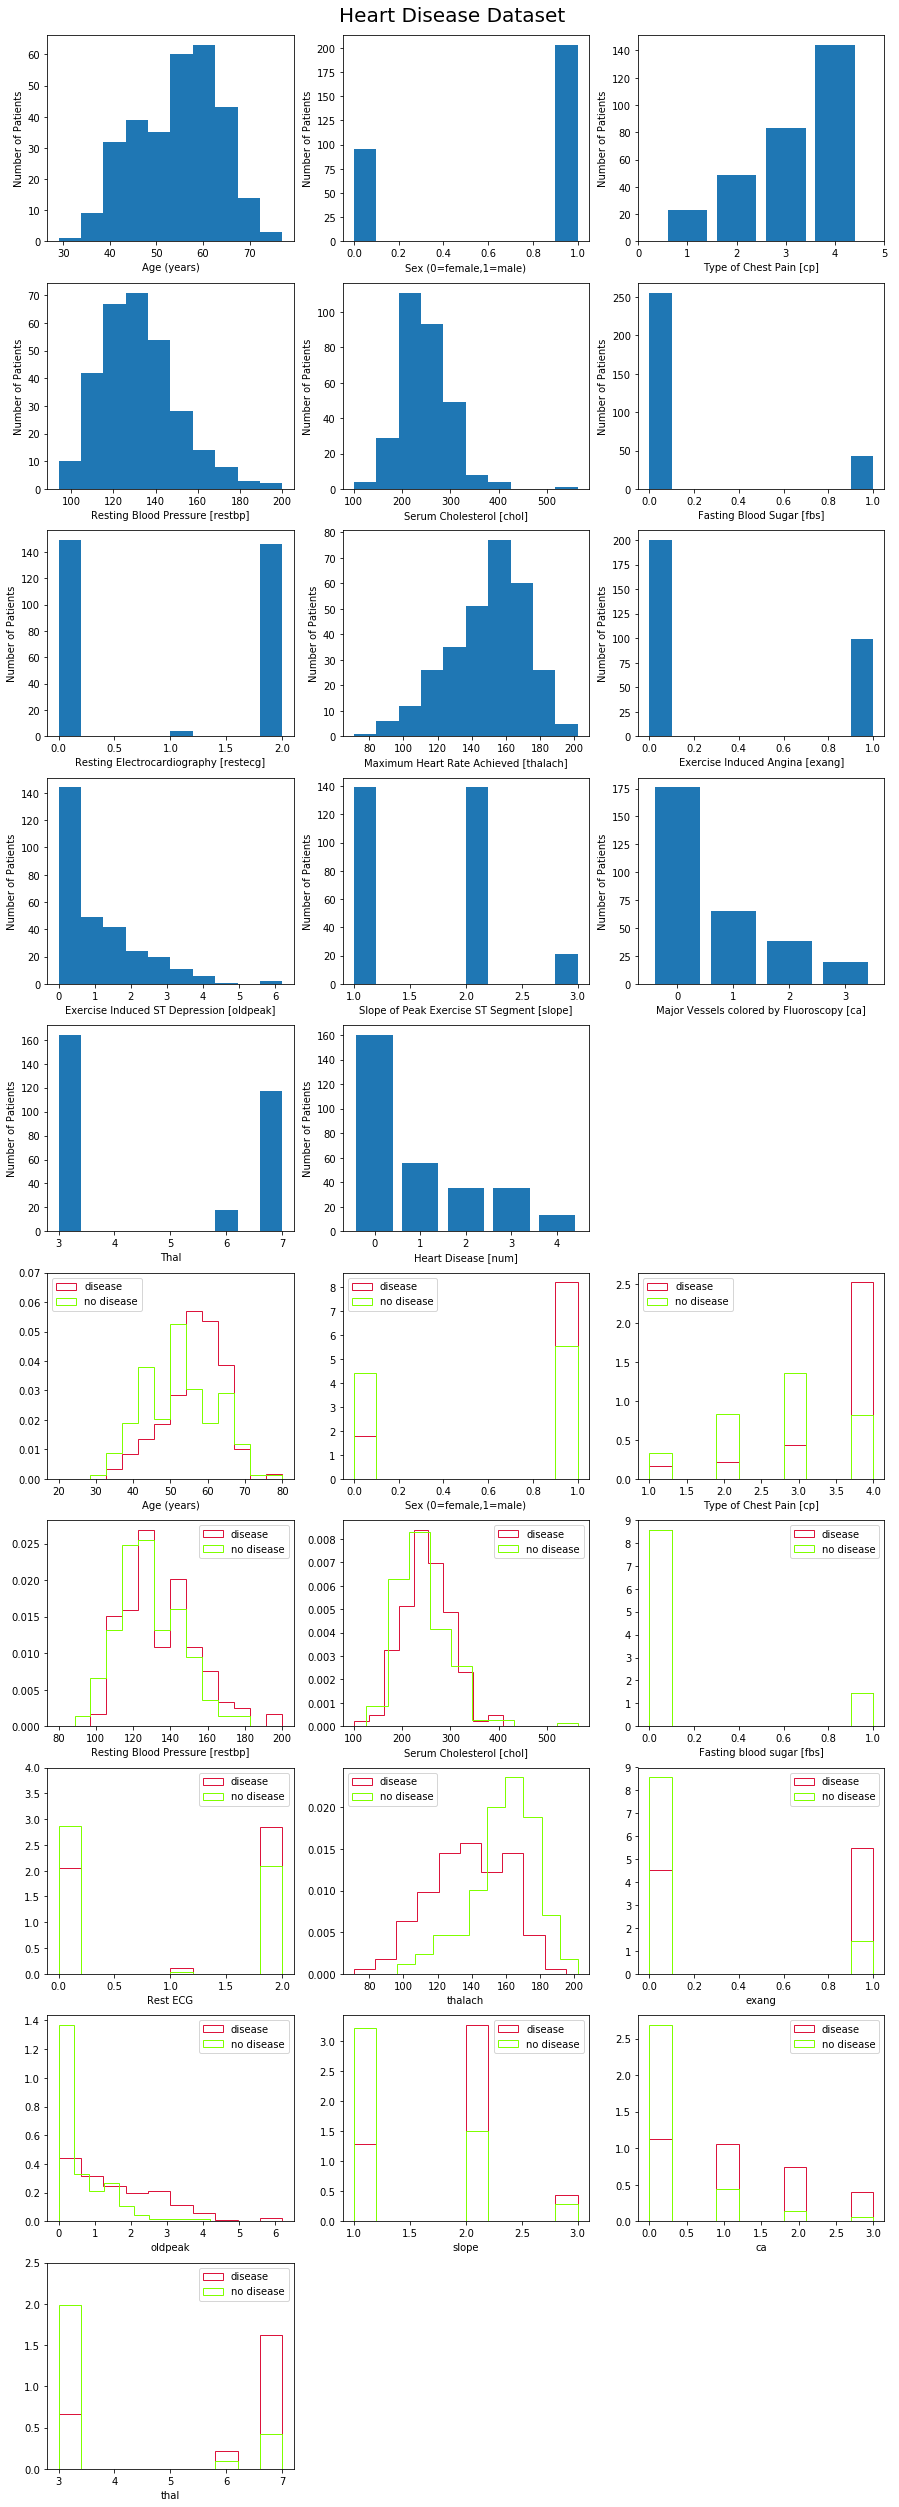

In [7]:
fig, axes = plt.subplots( nrows=10, ncols=3, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Dataset", fontsize=20)
axes[0,0].hist(df0.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(df0.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[0,2].hist(df0.cp,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].set_ylabel("Number of Patients")
axes[1,0].hist(df0.restbp)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df0.chol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df0.fbs)
axes[1,2].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,2].set_ylabel("Number of Patients")
axes[2,0].hist(df0.restecg)
axes[2,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df0.thalach)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df0.exang)
axes[2,2].set_xlabel("Exercise Induced Angina [exang]")
axes[2,2].set_ylabel("Number of Patients")
axes[3,0].hist(df0.oldpeak)
axes[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[3,0].set_ylabel("Number of Patients")
axes[3,1].hist(df0.slope)
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df0.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[3,2].set_xlim(-0.7,3.7)
axes[3,2].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[3,2].set_ylabel("Number of Patients")
axes[4,0].hist(df0.thal)
axes[4,0].set_xlabel("Thal")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].hist(df0.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[4,1].set_xlabel("Heart Disease [num]")
axes[4,1].set_ylabel("Number of Patients")
axes[4,2].axis("off")

#Marginal Feature Distribution comapared for disease and not-disease
bins = np.linspace(20, 80, 15)
axes[5,0].hist(df0[df0.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,0].hist(df0[df0.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,0].set_xlabel("Age (years)")
axes[5,0].set_ylim(0.0,0.070)
axes[5,0].legend(prop={'size': 10},loc="upper left")
axes[5,1].hist(df0[df0.num>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,1].hist(df0[df0.num==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,1].set_xlabel("Sex (0=female,1=male)")
axes[5,1].legend(prop={'size': 10},loc="upper left")
axes[5,2].hist(df0[df0.num>0].cp.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,2].hist(df0[df0.num==0].cp,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,2].set_xlabel("Type of Chest Pain [cp]")
axes[5,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[6,0].hist(df0[df0.num>0].restbp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,0].hist(df0[df0.num==0].restbp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[6,0].legend(prop={'size': 10},loc="upper right")
axes[6,1].hist(df0[df0.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,1].hist(df0[df0.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,1].set_xlabel("Serum Cholesterol [chol]")
axes[6,1].legend(prop={'size': 10},loc="upper right")
axes[6,2].hist(df0[df0.num>0].fbs.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,2].hist(df0[df0.num==0].fbs,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,2].set_xlabel("Fasting blood sugar [fbs]")
axes[6,2].legend(prop={'size': 10},loc="upper right")
axes[7,0].hist(df0[df0.num>0].restecg.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,0].hist(df0[df0.num==0].restecg,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,0].set_xlabel("Rest ECG")
axes[7,0].set_ylim(0.0,4.0)
axes[7,0].legend(prop={'size': 10},loc="upper right")
axes[7,1].hist(df0[df0.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,1].hist(df0[df0.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,1].set_xlabel("thalach")
axes[7,1].legend(prop={'size': 10},loc="upper left")
axes[7,2].hist(df0[df0.num>0].exang.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,2].hist(df0[df0.num==0].exang,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,2].set_xlabel("exang")
axes[7,2].legend(prop={'size': 10},loc="upper right")
axes[8,0].hist(df0[df0.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,0].hist(df0[df0.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,0].set_xlabel("oldpeak")
axes[8,0].legend(prop={'size': 10},loc="upper right")
axes[8,1].hist(df0[df0.num>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,1].hist(df0[df0.num==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,1].set_xlabel("slope")
axes[8,1].legend(prop={'size': 10},loc="upper right")
axes[8,2].hist(df0[df0.num>0].ca.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,2].hist(df0[df0.num==0].ca,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,2].set_xlabel("ca")
axes[8,2].legend(prop={'size': 10},loc="upper right")
axes[9,0].hist(df0[df0.num>0].thal.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[9,0].hist(df0[df0.num==0].thal,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[9,0].set_xlabel("thal")
axes[9,0].set_ylim(0.0,2.5)
axes[9,0].legend(prop={'size': 10},loc="upper right")

axes[9,1].axis("off")
axes[9,2].axis("off")

plt.show()

In [8]:
# Compute intrinsic discrepancies between disease and no-disease feature distributions
int_discr = {}
hist,bin_edges   = np.histogram(df0.age,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].age,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].age,bins=bin_edges,density=False)
int_discr["age"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].sex,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].sex,bins=(-0.5,0.5,1.5),density=False)
int_discr["sex"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].cp,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].cp,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
int_discr["cp"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df0.restbp,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].restbp,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].restbp,bins=bin_edges,density=False)
int_discr["restbp"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df0.chol,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].chol,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].chol,bins=bin_edges,density=False)
int_discr["chol"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].fbs,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].fbs,bins=(-0.5,0.5,1.5),density=False)
int_discr["fbs"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].restecg,bins=(-0.5,0.5,1.5,2.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].restecg,bins=(-0.5,0.5,1.5,2.5),density=False)
int_discr["restecg"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df0.thalach,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].thalach,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].thalach,bins=bin_edges,density=False)
int_discr["thalach"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].exang,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].exang,bins=(-0.5,0.5,1.5),density=False)
int_discr["exang"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df0.oldpeak,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].oldpeak,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].oldpeak,bins=bin_edges,density=False)
int_discr["oldpeak"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
int_discr["slope"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].ca,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].ca,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
int_discr["ca"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].thal,bins=(2.5,3.5,6.5,7.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].thal,bins=(2.5,3.5,6.5,7.5),density=False)
int_discr["thal"] = intrinsic_discrepancy(hist1,hist2)
id_list = Counter(int_discr).most_common()
print ('Intrinsic discrepancies between disease and no-disease, in decreasing order: ')
for item in id_list:
    print ('   %f  (%s)' % (item[1],item[0]))

Intrinsic discrepancies between disease and no-disease, in decreasing order: 
   0.609044  (thal)
   0.584354  (cp)
   0.478634  (ca)
   0.456496  (thalach)
   0.420033  (oldpeak)
   0.352659  (exang)
   0.312049  (slope)
   0.198552  (age)
   0.156002  (sex)
   0.058716  (restecg)
   0.033252  (restbp)
   0.030527  (chol)
   0.000000  (fbs)


In [9]:
#Converting categorial values into discrete values
#Note that feature ca is discrete but not categorical, so we don't convert it.
df = df0.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df = df.join(dummies)
del df["cp"]
del df["cp_4.0"]
df = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df = df.join(dummies)
del df["restecg"]
del df["recg_0.0"]
df = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df = df.join(dummies)
del df["thal"]
del df["thal_3.0"]
df = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})

#Replace response variable values and renaming it hd
#The num variable values of 1,2,3,4 are replaced with 1 in order to signify that the patient has heart disease
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df = df.rename(columns = {"num":"hd"})

new_columns_1 = ["age", "sex", "restbp", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]

print ('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.hd==1].index),len(df[df.hd==0].index)))
print (df.head())
print (df.describe())

# Standardize the dataframe
stdcols = ["age","restbp","chol","thalach","oldpeak"]
nrmcols = ["ca"]
stddf = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["hd"]
Xall = stddf[new_columns_2[1:]].values


Number of patients in dataframe: 299, with disease: 139, without disease: 160

    age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca   hd  cp_1  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0  0.0     1   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0  1.0     0   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0  1.0     0   
3  37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0  0.0     0   
4  41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0  0.0     0   

   cp_2  cp_3  recg_1  recg_2  slope_1  slope_3  thal_6  thal_7  
0     0     0       0       1        0        1       1       0  
1     0     0       0       1        0        0       0       0  
2     0     0       0       1        0        0       0       1  
3     0     1       0       0        0        1       0       0  
4     1     0       0       1        1        0       0       0  
              age        sex      restbp        chol         

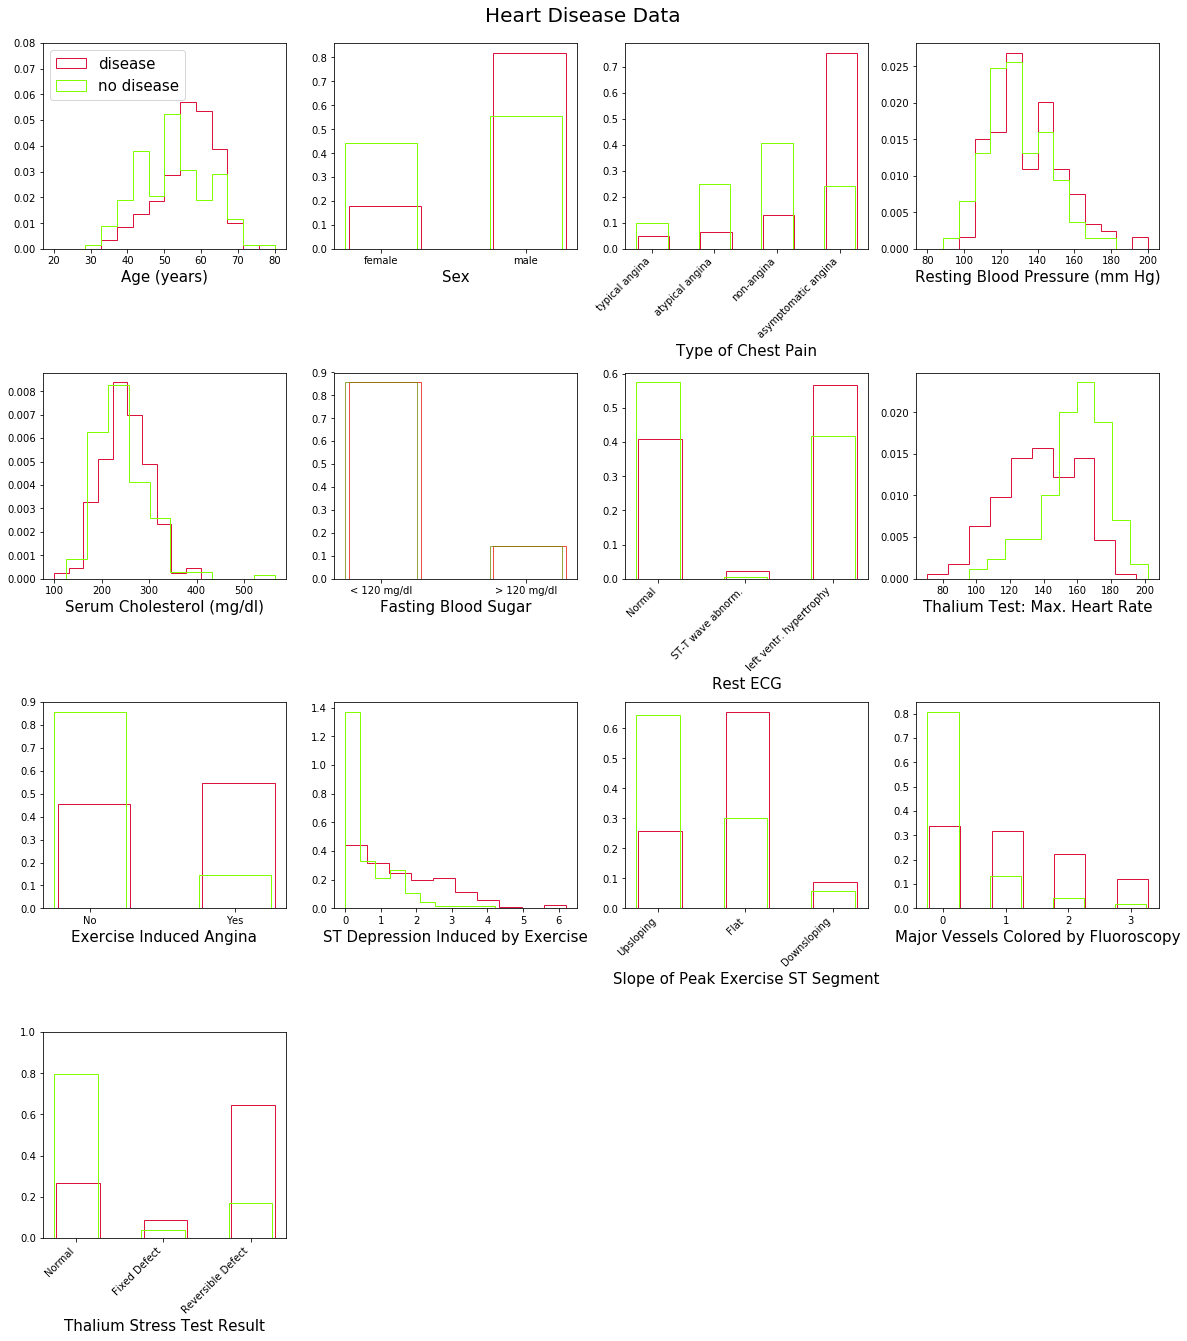

In [10]:
'''
Generate plots for blog
'''
fig, axes = plt.subplots( nrows=4, ncols=4, figsize=(20,20) )
plt.subplots_adjust( wspace=0.20, hspace=0.60, top=0.955)
plt.suptitle("Heart Disease Data", fontsize=20)

bins = np.linspace(20, 80, 15)
axes[0,0].hist(df0[df0.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,0].hist(df0[df0.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,0].set_xlabel("Age (years)",fontsize=15)
axes[0,0].set_ylim(0.0,0.080)
axes[0,0].legend(prop={'size': 15},loc="upper left")

bins = np.arange(2)
width = 0.5
heights1 = df0[df0.num>0]["sex"].groupby(df0["sex"]).count()
heights2 = df0[df0.num==0]["sex"].groupby(df0["sex"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[0,1].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[0,1].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[0,1].set_xlabel("Sex",fontsize=15)
axes[0,1].set_xticks(bins)
axes[0,1].set_xticklabels(["female","male"],ha="center")

bins = np.arange(4)
width = 0.5
heights1 = df0[df0.num>0]["cp"].groupby(df0["cp"]).count()
heights2 = df0[df0.num==0]["cp"].groupby(df0["cp"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[0,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[0,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[0,2].set_xlabel("Type of Chest Pain",fontsize=15)
axes[0,2].set_xticks(bins)
axes[0,2].set_xticklabels(["typical angina", "atypical angina", "non-angina", "asymptomatic angina"],
                          ha="right",rotation=45.)

bins = np.linspace(80, 200, 15)
axes[0,3].hist(df0[df0.num>0].restbp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,3].hist(df0[df0.num==0].restbp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,3].set_xlabel("Resting Blood Pressure (mm Hg)",fontsize=15)

axes[1,0].hist(df0[df0.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,0].hist(df0[df0.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,0].set_xlabel("Serum Cholesterol (mg/dl)",fontsize=15)

bins = np.arange(2)
width = 0.5
heights1 = df0[df0.num>0]["fbs"].groupby(df0["fbs"]).count()
heights2 = df0[df0.num==0]["fbs"].groupby(df0["fbs"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[1,1].bar(bins+0.025,heights1,width,align="center",edgecolor=(0.917,0.083,0,0.75),color=["none"],label="disease")
axes[1,1].bar(bins,heights2,width,align="center",edgecolor=(0.467,0.533,0,0.75),color=["none"],label="no disease")
axes[1,1].set_xlabel("Fasting Blood Sugar",fontsize=15)
axes[1,1].set_xticks(bins)
axes[1,1].set_xticklabels(["< 120 mg/dl","> 120 mg/dl"],ha="center")

bins = np.arange(3)
width = 0.5
heights1 = df0[df0.num>0]["restecg"].groupby(df0["restecg"]).count()
heights2 = df0[df0.num==0]["restecg"].groupby(df0["restecg"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[1,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[1,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[1,2].set_xlabel("Rest ECG",fontsize=15)
axes[1,2].set_xticks(bins)
axes[1,2].set_xticklabels(["Normal","ST-T wave abnorm.","left ventr. hypertrophy"],ha="right",rotation=45.)

axes[1,3].hist(df0[df0.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,3].hist(df0[df0.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,3].set_xlabel("Thalium Test: Max. Heart Rate",fontsize=15)

bins = np.arange(2)
width = 0.5
heights1 = df0[df0.num>0]["exang"].groupby(df0["exang"]).count()
heights2 = df0[df0.num==0]["exang"].groupby(df0["exang"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[2,0].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,0].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,0].set_xlabel("Exercise Induced Angina",fontsize=15)
axes[2,0].set_xticks(bins)
axes[2,0].set_xticklabels(["No","Yes"],ha="center")

axes[2,1].hist(df0[df0.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,1].hist(df0[df0.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,1].set_xlabel("ST Depression Induced by Exercise", fontsize=15)

bins = np.arange(3)
width = 0.5
heights1 = df0[df0.num>0]["slope"].groupby(df0["slope"]).count()
heights2 = df0[df0.num==0]["slope"].groupby(df0["slope"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[2,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,2].set_xlabel("Slope of Peak Exercise ST Segment",fontsize=15)
axes[2,2].set_xticks(bins)
axes[2,2].set_xticklabels(["Upsloping","Flat","Downsloping"],ha="right",rotation=45.)

bins = np.arange(4)
width = 0.5
heights1 = df0[df0.num>0]["ca"].groupby(df0["ca"]).count()
heights2 = df0[df0.num==0]["ca"].groupby(df0["ca"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[2,3].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,3].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,3].set_xlabel("Major Vessels Colored by Fluoroscopy",fontsize=15)
axes[2,3].set_xticks(bins)
axes[2,3].set_xticklabels(["0","1","2","3"],ha="center")

bins = np.arange(3)
width = 0.5
heights1 = df0[df0.num>0]["thal"].groupby(df0["thal"]).count()
heights2 = df0[df0.num==0]["thal"].groupby(df0["thal"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[3,0].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[3,0].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[3,0].set_xlabel("Thalium Stress Test Result",fontsize=15)
axes[3,0].set_xticks(bins)
axes[3,0].set_xticklabels(["Normal","Fixed Defect","Reversible Defect"],ha="right",rotation=45.)
axes[3,0].set_ylim(0.0,1.0)

axes[3,1].axis("off")
axes[3,2].axis("off")
axes[3,3].axis("off")

plt.show()
fig.savefig("plots.png")

In [11]:
'''
Note about logistic regression with scikit-learn:
-> In scikit-learn we can specify penalty="l1" or penalty="l2", with
  an associated C=c, which is the *inverse* of the regularization strength.
  Thus, for zero regularization specify a high value of c.  Scikit-learn
  does not calculate uncertainties on the fit coefficients.
'''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

lasso = False

nfeatures = len(stddf.columns)
if lasso:           # lasso regularization
    penalty = "l1"
    cval    = 1.0
    alpha   = [1.0]*nfeatures
else:               # no regularization
    penalty = "l1"
    cval    = 1000.0
    alpha   = 0.0

model = LogisticRegression(fit_intercept=True,penalty=penalty,dual=False,C=cval)
print(model)
lrfit = model.fit(Xall,yall)
print('\nLogisticRegression score on full data set: %f\n' % lrfit.score(Xall,yall))
ypred = model.predict(Xall)
print ('\nClassification report on full data set:')
print(metrics.classification_report(yall,ypred))
print ('\nConfusion matrix:')
print(metrics.confusion_matrix(yall,ypred))
print ('\nLogisticRegression coefficients:')
coeff = model.coef_.tolist()[0]
for index in range(len(coeff)):
    print ('%s : %8.5f' % (new_columns_2[index+1].rjust(9),coeff[index]))
print( 'Intercept : %f' %model.intercept_)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression score on full data set: 0.872910


Classification report on full data set:
             precision    recall  f1-score   support

        0.0       0.86      0.91      0.88       160
        1.0       0.89      0.83      0.86       139

avg / total       0.87      0.87      0.87       299


Confusion matrix:
[[146  14]
 [ 24 115]]

LogisticRegression coefficients:
      age : -0.12369
      sex :  1.54885
   restbp :  0.43320
     chol :  0.22079
      fbs : -0.59484
  thalach : -0.41726
    exang :  0.71859
  oldpeak :  0.41976
       ca :  3.92875
     cp_1 : -2.10034
     cp_2 : -0.84540
     cp_3 : -1.84976
   recg_1 :  0.77573
   recg_2 :  0.46907
  slope_1 : -1.16387
  slope_3 : -0.64683
   thal_6 